In [1]:
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# PCA

PCA (principal component analysis) is an **unsupervised** technique that determines **the directions of maximum variance** in the feature space, so that **the directions are orthogonal to each other**.

That is,

> the first principal component is the direction that maximizes the variance of the projected data onto its direction; the second principal component is a direction orthogonal to the first that also maximizes the variance in this direction, and so on.

<img src=https://austingwalters.com/wp-content/uploads/2014/11/gaussDist-labeled.png width=400>

It is worth remembering that:

- if the original space has $n$ features, it is possible to construct $n$ principal components
- each principal component is a **linear combination of the original features**
- the principal components are orthogonal to each other
- the principal components are linearly uncorrelated

It is very common for PCA to be used as a **dimensionality reduction** technique, because, **in the transformed space of principal components**, it is common that a large part of the complete variance of the data is contained in the first $L$ principal components ($L < n$). So, instead of using the complete feature space (of dimension $n$) to build models, we can use only $L$ dimensions **of the principal component feature space**, thus reducing the dimensionality of the effective feature space in which the estimators will work.

The objectives of this reduction can be:

- avoid the curse of dimensionality
- train models more quickly (more efficiently), after all, there is less data
- supply data without any collinearity (there are estimators that assume non-collinearity)

## What is each PC?

As said above, each principal component is a **linear combination of the original features**. In this sense, we can see PCA as a method that constructs a new feature space, of the same dimension as the original space:

<img src=https://miro.medium.com/max/1200/1*V3JWBvxB92Uo116Bpxa3Tw.png width=700>

The point is that the feature space constructed by PCA is very particular: the new features are orthogonal to each other, and such that they maximize the variance of the data in each projection subspace, as we said above. Therefore, in practice, let $\mathcal{X}$ be an input space of $n$ dimensions, such that each feature vector $\vec{x} \in \mathcal{X}$ is given by:

$ \vec{x} = \left ( x_1, x_2, x_3, \cdots , x_n \right) $

After applying PCA, we will be in the space of principal components, such that a feature vector in this space, $\vec{x}_{PC}$, will be given by:

$ \vec{x}_{PC} = \left ( PC_1, PC_2, PC_3, \cdots , PC_n \right) $

Where each principal component is a linear combination of the original features, that is,

$ PC_i = \sum_{k=1}^n \alpha_{i, k} x_k = \alpha_{i, 1} x_1 +  \alpha_{i, 2} x_2 + \cdots +  \alpha_{i, n} x_n$

Note that each principal component $i$ has $n$ different coefficients $\alpha_{i, k}$, which accompany each of the features $k$ of the original space.

In [2]:
df = pd.read_csv("../data/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.shape

(150, 5)

In [4]:
X = df.drop(columns="species")
y = df["species"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

In the case of the iris dataset, we have 4 features, so that the original space has 4 dimensions, and a feature vector is:

$ \vec{x} = (x_1, x_2, x_3, x_4)$

Such as:

- $x_1$ : 'sepal_length', 
- $x_2$ : 'sepal_width', 
- $x_3$ : 'petal_length', 
- $x_4$ : 'petal_width'.

So, we expect that after PCA, the space of principal components also has 4 dimensions, that is,

$ \vec{x}_{PC} = \left ( PC_1, PC_2, PC_3, PC_4 \right) $

And the principal components will be:

$ PC_1 = \alpha_{1, 1} x_1 + \alpha_{1, 2} x_2 + \alpha_{1, 3} x_3 + \alpha_{1, 4} x_4$

$ PC_2 = \alpha_{2, 1} x_1 + \alpha_{2, 2} x_2 + \alpha_{2, 3} x_3 + \alpha_{2, 4} x_4$

$ PC_3 = \alpha_{3, 1} x_1 + \alpha_{3, 2} x_2 + \alpha_{3, 3} x_3 + \alpha_{3, 4} x_4$

$ PC_4 = \alpha_{4, 1} x_1 + \alpha_{4, 2} x_2 + \alpha_{4, 3} x_3 + \alpha_{4, 4} x_4$

In [6]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(X_train)

X_train_ss = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)
X_train_ss.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-1.721568,-0.332101,-1.345722,-1.323276
1,-1.124492,-1.227655,0.414505,0.651763
2,1.144395,-0.555990,0.584850,0.256755
3,-1.124492,0.115676,-1.288941,-1.454945
4,-0.408002,-1.227655,0.130598,0.125086


In [7]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42).fit(X_train_ss)

In [8]:
pca.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

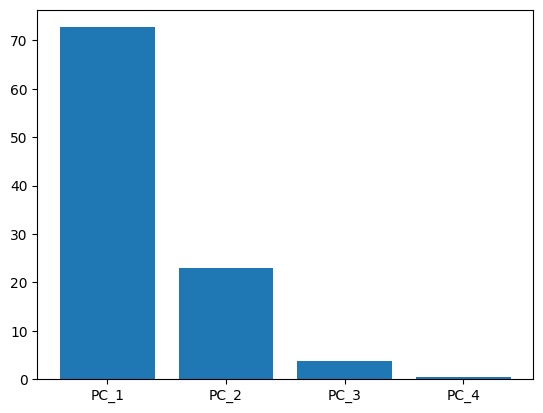

In [19]:
labels = [f"PC_{i+1}" for i in range(pca.n_components_)]
plt.bar(labels, pca.explained_variance_ratio_*100);

From the results, it is easy to see that with only 2 principal components, we capture 95% of the variance of the data. So, in case we want to reduce the number of dimensions from $n=4$ to $L=2$, we are guaranteed that a large part of the variability will be contained in the two principal components that we will use for modeling.

> notice that the choice of $L < n$ principal components can be seen as a **feature selection** procedure, but done **in the space of principal components**
> since it is not the original features that are selected, it is common to refer to this procedure as **dimensionality reduction** (and the dimensionality that is reduced is that of the principal component space)

Indeed, note that **all 4 original features** are present in each of the PCs, as terms of the linear combination that defines each PC. And, naturally, all 4 are present in the first $L$.

## PCA in the Pipeline

In [20]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [21]:
def classification_metrics(estimator, X_train, X_test, y_train, y_test):
    print("\nTrain evaluation metrics:")
    y_pred_train = estimator.predict(X_train)
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()
    print(classification_report(y_train, y_pred_train))

    print("\nTest evaluation metrics:")
    y_pred_test = estimator.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()
    print(classification_report(y_test, y_pred_test))

In [22]:
df = pd.read_csv("../data/iris.csv")

X = df.drop(columns="species")
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


Train evaluation metrics:


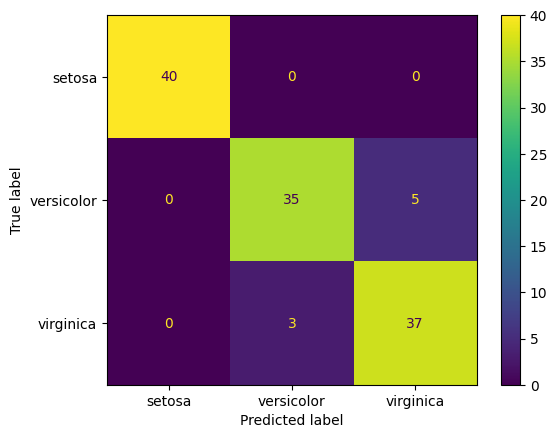

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.92      0.88      0.90        40
   virginica       0.88      0.93      0.90        40

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120


Test evaluation metrics:


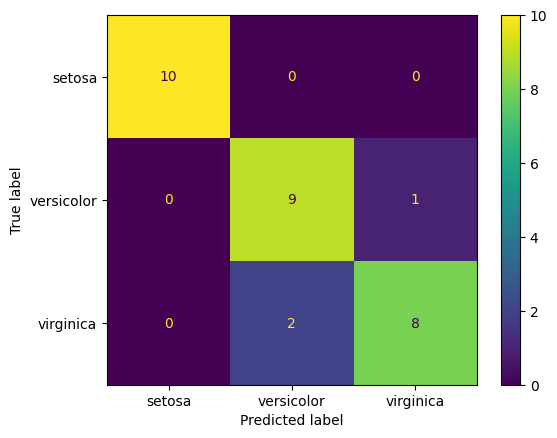

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [25]:
pipe_pca = Pipeline([("ss", StandardScaler()),
                     ("pca", PCA(n_components=2)),
                     ("lr", LogisticRegression(random_state=42))])

pipe_pca.fit(X_train, y_train)
classification_metrics(pipe_pca, X_train, X_test, y_train, y_test)